# Linear Regression

This notebook shows you a demo about how to use `learning` module. The very beginning step is __to put folder `learning` in your working directory__. Then you can import it for linear regression case as follow,

In [1]:
from learning.linReg import LinearReg

The documentation about `LinearReg` class can be accessed by

In [2]:
LinearReg?

Init signature: LinearReg()
Docstring:     
A class use to implement Linear Regression algorithm

Attributes
----------
intercept : float
    the intercept of the line equation
coef : float
    the slope of the line equation
X : float
    the input array
y : float
    the output array
y_pred : float
    the prediction array
    
Methods
-------
dimX(X)
    Transform X if its shape (len(X),) become (len(X), 1)
fit(X, y)
    Train and return the intercept and coefficient(slope).
    The calculation using normal function,
                $$  heta = (X^T X)^{-1} \cdot (X^T y) $$
    For theta[0] we get the intercept and theta[1:] we get 
    the coefficient(slope)
predict(X)
    Predict from trained model and return y_pred. The prediction using
    straight line model,
                        $$ y = a + bX $$
    where y: y_pred, a: the intercept, b: the slope(coef), and the input
    array X
meanSquaredError(y, y_pred)
    Return the mean squared error between y = y_test and y_prediction


### Module implementation

Now, I will show you how to implement the module. We generate our random dataset as below,

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# generate a dataset
rng = np.random.RandomState(1)
X = 10 * rng.rand(100)
y = 2 * X - 5 + rng.randn(100)

Then we implement the module,

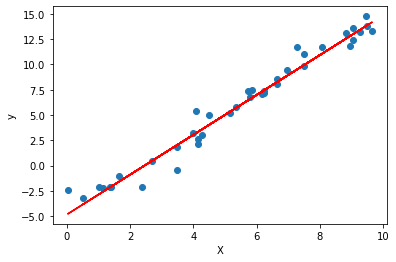

In [4]:
# Split the data into training/testing sets
X_train = X[:60]
X_test  = X[60:]
y_train = y[:60]
y_test  = y[60:]

# Create Linear Regression object
model = LinearReg()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make prediction using the testing set
y_pred = model.predict(X_test)

# Plot the result
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r');
plt.xlabel('X')
plt.ylabel('y');

model intercept and slope can be accessed,

In [5]:
model.intercept

-4.829898447556889

In [6]:
model.coef

array([1.97019291])

You can also return the metrics including the mean squared error, the mean absolute error, and the $r^2$ score.

In [7]:
# The mean squared error
model.meanSquaredError(y_test, y_pred)

0.9329278371121003

In [8]:
# The mean absolute error
model.meanAbsoluteError(y_test, y_pred)

0.6917063322406002

In [9]:
# The r2 score
model.r2Score(y_test, y_pred)

0.9698180496598352

### Benchmarking with `sklearn`

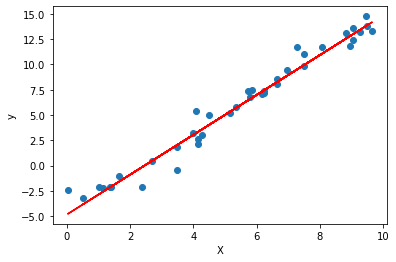

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create Linear Regression object
model_sklearn = LinearRegression(fit_intercept=True)

# Train the model using the training sets
model_sklearn.fit(X_train[:, np.newaxis], y_train)

# Make prediction using the testing set
y_pred_sklearn = model.predict(X_test[:, np.newaxis])

# Plot the result
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_sklearn, 'r');
plt.xlabel('X')
plt.ylabel('y');

In [11]:
model_sklearn.intercept_

-4.829898447556874

In [12]:
model_sklearn.coef_

array([1.97019291])

In [13]:
# The mean squared error
mean_squared_error(y_test, y_pred_sklearn)

0.9329278371121003

In [14]:
# The mean absolute error
mean_absolute_error(y_test, y_pred_sklearn)

0.6917063322406002

In [15]:
# The r2 score
r2_score(y_test, y_pred_sklearn)

0.9698180496598352